In [7]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import math
import warnings
warnings.filterwarnings('ignore')

from MASC_core import MASC_core

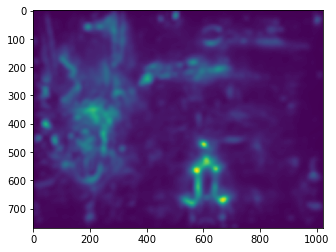

(768, 1024)


In [8]:
priority_map = np.double(np.array(Image.open('PriorityMap.png')))
priority_map = priority_map/np.max(priority_map)
plt.imshow(priority_map)
plt.show()

im_size = priority_map.shape
print(im_size)
im_h = im_size[0]
im_w = im_size[1]

if(len(im_size) > 2):
    priority_map = np.mean(priority_map,axis=2);
    
# set the initial fixation at center
row_im_f = math.floor(im_h/2) ;
col_im_f = math.floor(im_w/2) ;
RETINA_PIXDEG = 30 ; 

In [10]:
# MASC_core is the main function 
# input arguments: 
#     priority_map: Priority map
#     RETINA_PIXDEG: The number of pixels in one degree visual angle of the visual display  
#     col_im_f: The column for the current fixation (x)
#     row_im_f: The row for the current fixtion (y)
# outputs: 
#     col_im_m: The column for the next fixation (x)
#     row_im_m: The row for the next fixation (x)
#     moto_Coll_framed: The activity map in the motor layer of the SC 
#     col_m_coll: the column coordiatne of the winning population in the SC motor map
#     row_m_coll: the row coordiatne of the winning population in the SC motor map
    
col_im_m, row_im_m, moto_Coll_framed, col_m_coll, row_m_coll = MASC_core(priority_map, RETINA_PIXDEG, col_im_f, row_im_f)

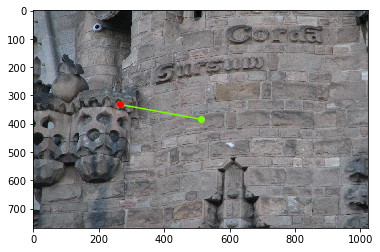

In [11]:
scene_image =  np.array(Image.open('1.jpg'))
plt.imshow(scene_image, aspect='auto')

plt.plot([col_im_f, col_im_m], [row_im_f, row_im_m], '-o', color='lawngreen')
plt.plot(col_im_m, row_im_m, 'o',color='red')
plt.savefig('saccade_scene_1.jpg')
plt.show()


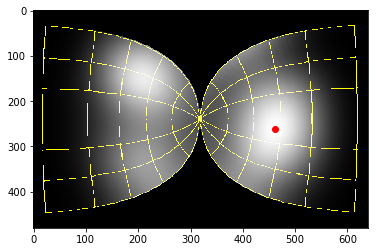

In [12]:
plt.imshow(moto_Coll_framed, aspect='auto')
plt.plot(col_m_coll, row_m_coll, 'o',color='red')
plt.savefig('moto_Coll_framed_1.jpg')
plt.show()